In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df=pd.read_csv('TRAIN.csv')
test=pd.read_csv('test.csv')
df.drop(columns=['Customers'],inplace=True)

C:\Users\Ashwin\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.describe()

,Store,DayOfWeek,Sales,Open,Promo,SchoolHoliday
count,712046.000000,712046.000000,712046.000000,712046.000000,712046.000000,712046.000000
mean,558.427662,3.999787,5872.082608,0.828574,0.380600,0.172167
std,321.965298,1.996273,3918.569033,0.376881,0.485535,0.377526
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,3795.000000,1.000000,0.000000,0.000000
50%,558.000000,4.000000,5848.000000,1.000000,0.000000,0.000000
75%,838.000000,6.000000,7991.000000,1.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,1.000000,1.000000,1.000000


In [4]:
df.corr()

,Store,DayOfWeek,Sales,Open,Promo,SchoolHoliday
Store,1.000000,0.000566,0.003725,-0.000475,0.000540,0.001498
DayOfWeek,0.000566,1.000000,-0.467571,-0.532839,-0.393109,-0.203885
Sales,0.003725,-0.467571,1.000000,0.681612,0.453403,0.077300
Open,-0.000475,-0.532839,0.681612,1.000000,0.297240,0.074130
Promo,0.000540,-0.393109,0.453403,0.297240,1.000000,0.068218
SchoolHoliday,0.001498,-0.203885,0.077300,0.074130,0.068218,1.000000


## Observations:

As we can see from our correlation matrix, Sales has good correlation with Customers and Open, which makes sense because number of customers should be directly proportionate to sales. Open is a categorical variable, so we can essentially say, Open stores sell more, which again is logical. Considering the linearity, a simple Linear Regression Model could be worth trying out.

C:\Users\Ashwin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

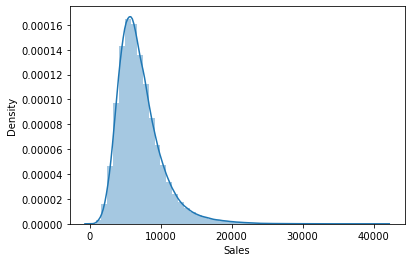

In [5]:
sns.distplot(df[df["Open"]==1]['Sales'])

C:\Users\Ashwin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ashwin\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

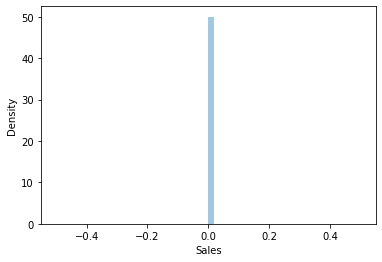

In [6]:
sns.distplot(df[df["Open"]==0]['Sales'])

In [7]:
df[df["Open"]==0]['Sales'].max()

0

There seem to be quite a lot of rows with sales 0, which could be helpful in our analysis. A Decision Tree might be able to recognise the pattern of Open = 0 -> Sales=0

In [8]:
def getMonthEnd(date):
    if(int(date[-2:])>=30):
        return 1
    else:
        return 0

In [9]:
def openOrPromo(df):
    if(df['Open']+df['Promo']>0):
        return 1
    else:
        return 0
        

In [10]:
df['OpenOrPromo']=df.apply(openOrPromo,axis=1)
test['OpenOrPromo']=test.apply(openOrPromo,axis=1)

In [11]:
df['isMonthEnd']=df['Date'].apply(getMonthEnd)
test['isMonthEnd']=test['Date'].apply(getMonthEnd)

In [12]:
df[df['OpenOrPromo']==0]

,Store,DayOfWeek,Date,Sales,Open,Promo,StateHoliday,SchoolHoliday,OpenOrPromo,isMonthEnd
5575,1,7,2015-07-26,0,0,0,0,0,0,0
5576,2,7,2015-07-26,0,0,0,0,0,0,0
5577,3,7,2015-07-26,0,0,0,0,0,0,0
5578,4,7,2015-07-26,0,0,0,0,0,0,0
5579,5,7,2015-07-26,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
710580,1111,4,2013-10-03,0,0,0,a,0,0,0
710581,1112,4,2013-10-03,0,0,0,a,0,0,0
710582,1113,4,2013-10-03,0,0,0,a,0,0,0
710583,1114,4,2013-10-03,0,0,0,a,1,0,0


In [13]:
df.corr()

,Store,DayOfWeek,Sales,Open,Promo,SchoolHoliday,OpenOrPromo,isMonthEnd
Store,1.000000,0.000566,0.003725,-0.000475,0.000540,0.001498,-0.000242,0.000178
DayOfWeek,0.000566,1.000000,-0.467571,-0.532839,-0.393109,-0.203885,-0.543027,0.001896
Sales,0.003725,-0.467571,1.000000,0.681612,0.453403,0.077300,0.655404,0.072481
Open,-0.000475,-0.532839,0.681612,1.000000,0.297240,0.074130,0.961550,0.028374
Promo,0.000540,-0.393109,0.453403,0.297240,1.000000,0.068218,0.342841,0.008508
SchoolHoliday,0.001498,-0.203885,0.077300,0.074130,0.068218,1.000000,0.090734,0.113317
OpenOrPromo,-0.000242,-0.543027,0.655404,0.961550,0.342841,0.090734,1.000000,0.022743
isMonthEnd,0.000178,0.001896,0.072481,0.028374,0.008508,0.113317,0.022743,1.000000


In [14]:
HolidayDict={'0':0,'a':1,'b':2,'c':3}
df['StateHoliday'].unique()
df.replace({"StateHoliday":HolidayDict},inplace=True)
test.replace({"StateHoliday":HolidayDict},inplace=True)

In [15]:
df.corr()


,Store,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,OpenOrPromo,isMonthEnd
Store,1.000000,0.000566,0.003725,-0.000475,0.000540,0.000530,0.001498,-0.000242,0.000178
DayOfWeek,0.000566,1.000000,-0.467571,-0.532839,-0.393109,-0.035096,-0.203885,-0.543027,0.001896
Sales,0.003725,-0.467571,1.000000,0.681612,0.453403,-0.234889,0.077300,0.655404,0.072481
Open,-0.000475,-0.532839,0.681612,1.000000,0.297240,-0.347899,0.074130,0.961550,0.028374
Promo,0.000540,-0.393109,0.453403,0.297240,1.000000,-0.035350,0.068218,0.342841,0.008508
StateHoliday,0.000530,-0.035096,-0.234889,-0.347899,-0.035350,1.000000,0.215966,-0.243607,-0.030045
SchoolHoliday,0.001498,-0.203885,0.077300,0.074130,0.068218,0.215966,1.000000,0.090734,0.113317
OpenOrPromo,-0.000242,-0.543027,0.655404,0.961550,0.342841,-0.243607,0.090734,1.000000,0.022743
isMonthEnd,0.000178,0.001896,0.072481,0.028374,0.008508,-0.030045,0.113317,0.022743,1.000000


In [16]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Sales','OpenOrPromo','Date']), df['Sales'], test_size=0.30, random_state=42)

In [17]:
from sklearn import metrics

In [18]:
def printErrorMetrics(y_test,final_pred):
    print('MAE:', metrics.mean_absolute_error(y_test,final_pred))
    print('MSE:', metrics.mean_squared_error(y_test, final_pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, final_pred)))
    print("R2:",metrics.r2_score(y_test,final_pred))

In [19]:
def makePredictions(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)
    printErrorMetrics(prediction,y_test)



In [20]:
df.describe()

,Store,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,OpenOrPromo,isMonthEnd
count,712046.000000,712046.000000,712046.000000,712046.000000,712046.000000,712046.000000,712046.000000,712046.000000,712046.000000
mean,558.427662,3.999787,5872.082608,0.828574,0.380600,0.050230,0.172167,0.839428,0.049147
std,321.965298,1.996273,3918.569033,0.376881,0.485535,0.307868,0.377526,0.367136,0.216175
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,3795.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,558.000000,4.000000,5848.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,838.000000,6.000000,7991.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000


In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
rf=RandomForestRegressor(n_estimators=250,criterion='mse',)

In [23]:
makePredictions(rf,X_train,y_train,X_test,y_test)

MAE: 713.4146285576377
MSE: 1533369.1492851884
RMSE: 1238.2928366445428
R2: 0.8915973680284253


In [24]:
test

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,OpenOrPromo,isMonthEnd
0,767,1,2013-04-01,0,0,2,1,0,0
1,1111,6,2013-03-16,1,0,0,0,1,0
2,45,4,2013-08-01,1,1,0,1,1,0
3,500,4,2013-05-23,1,0,0,1,1,0
4,82,2,2013-08-06,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
305158,412,2,2013-05-28,1,1,0,1,1,0
305159,936,6,2013-03-02,1,0,0,0,1,0
305160,21,1,2013-09-16,1,0,0,0,1,0
305161,1077,6,2013-06-22,1,0,0,0,1,0


In [25]:
test_df=test.drop(columns=['OpenOrPromo','Date'])

In [26]:
predictions=rf.predict(test_df)

In [27]:
predictions

array([   0.        , 3282.93406671, 6264.41110835, ..., 3938.0616174 ,
       2912.62231167, 6361.96665067])

In [28]:
predictions=pd.DataFrame(predictions, columns=['Sales'])

In [29]:
predictions

,Sales
0,0.000000
1,3282.934067
2,6264.411108
3,4193.681241
4,7336.812981
...,...
305158,10097.540351
305159,6633.222337
305160,3938.061617
305161,2912.622312


In [30]:
predictions.to_csv('SubmissionRFReg.csv')